In [187]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [188]:
manuf_product = pd.read_csv("20150512_manuf_product-count.csv", sep="|")

In [189]:
unspc_product = pd.read_csv("20150512_unspsc_product-count.csv", sep="|")

In [190]:
manuf_product.head()

,manufacturer_id,name,product_count
0,106548,_NO-MANUFACTURER_,217823
1,26559,HP,113080
2,99062,UNKNOWN,90363
3,86654,GRAINGER APPROVED,51705
4,86629,Unknown,34544


In [191]:
unspc_product.head()

,unspsc_category_id,level,description,product_count
0,15425,43,Information Technology Broadcasting and Teleco...,43343
1,22444,81111812,Computer hardware maintenance or support,29759
2,15561,43211503,Notebook computers,29538
3,22445,81111814,Co location service,28136
4,15570,432116,Computer accessories,19411


In [43]:
manuf_product = manuf_product[manuf_product['name'] != '_NO-MANUFACTURER_']
manuf_product = manuf_product[manuf_product['name'] != 'UNKNOWN']
manuf_product = manuf_product[manuf_product['name'] != 'Unknown']

In [155]:
top_manuf = manuf_product.head(50)

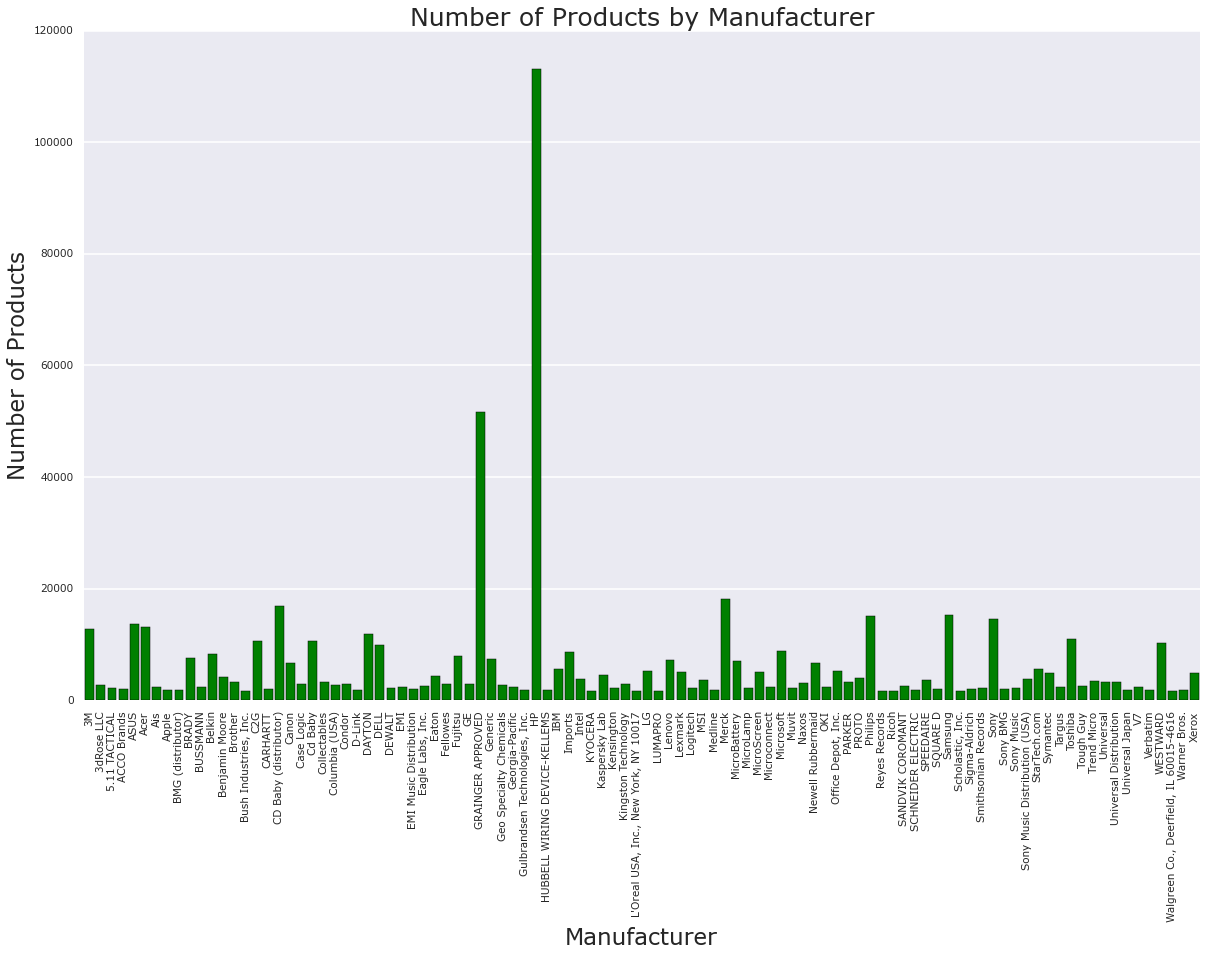

In [150]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
sns.set(font="Verdana")
sns.set_context("poster", rc={"figure.figsize": (20, 12)}, font_scale=1.3)
manuf_plot = sns.barplot("name", "product_count", data=top_manuf, color="green")
manuf_plot.tick_params(axis='both', which='major', labelsize=10.5)
manuf_plot.set_title("Number of Products by Manufacturer")
manuf_plot.set_xlabel("Manufacturer")
manuf_plot.set_ylabel("Number of Products")

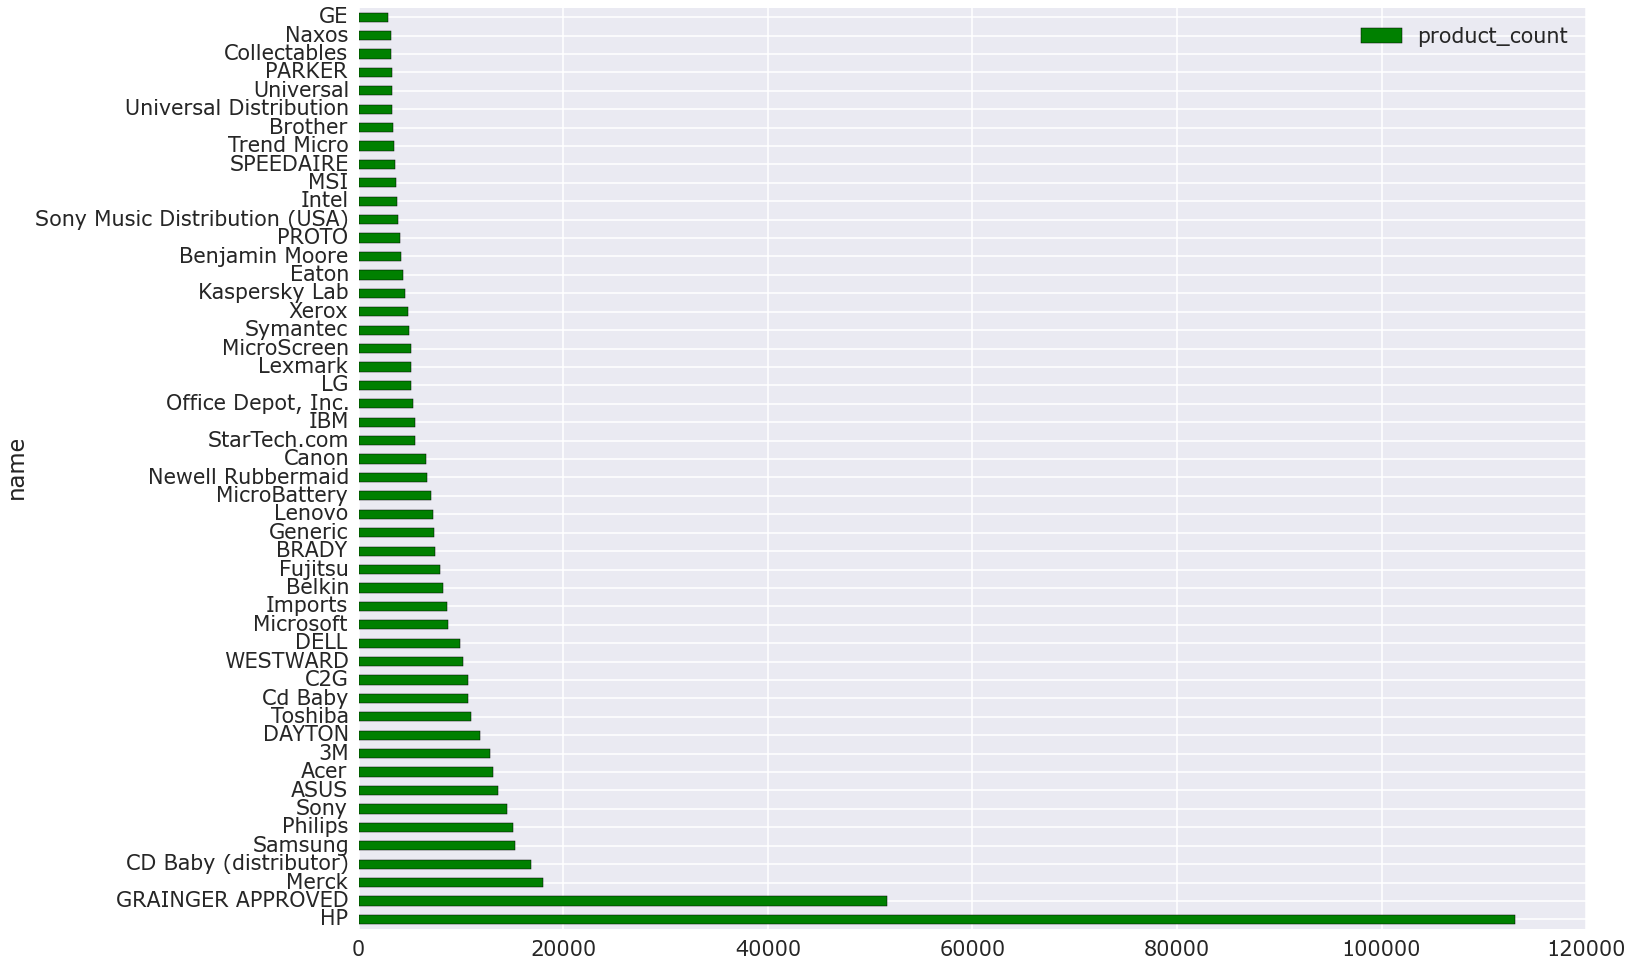

In [164]:
top_manuf = manuf_product.head(50)
sns.set(font="Verdana")
sns.set_context("poster", rc={"figure.figsize": (22, 16.5)}, font_scale=1.3)
top_manuf.plot("name", "product_count", kind="barh", color="green")

In [165]:
unspc_top = unspc_product.head(100)

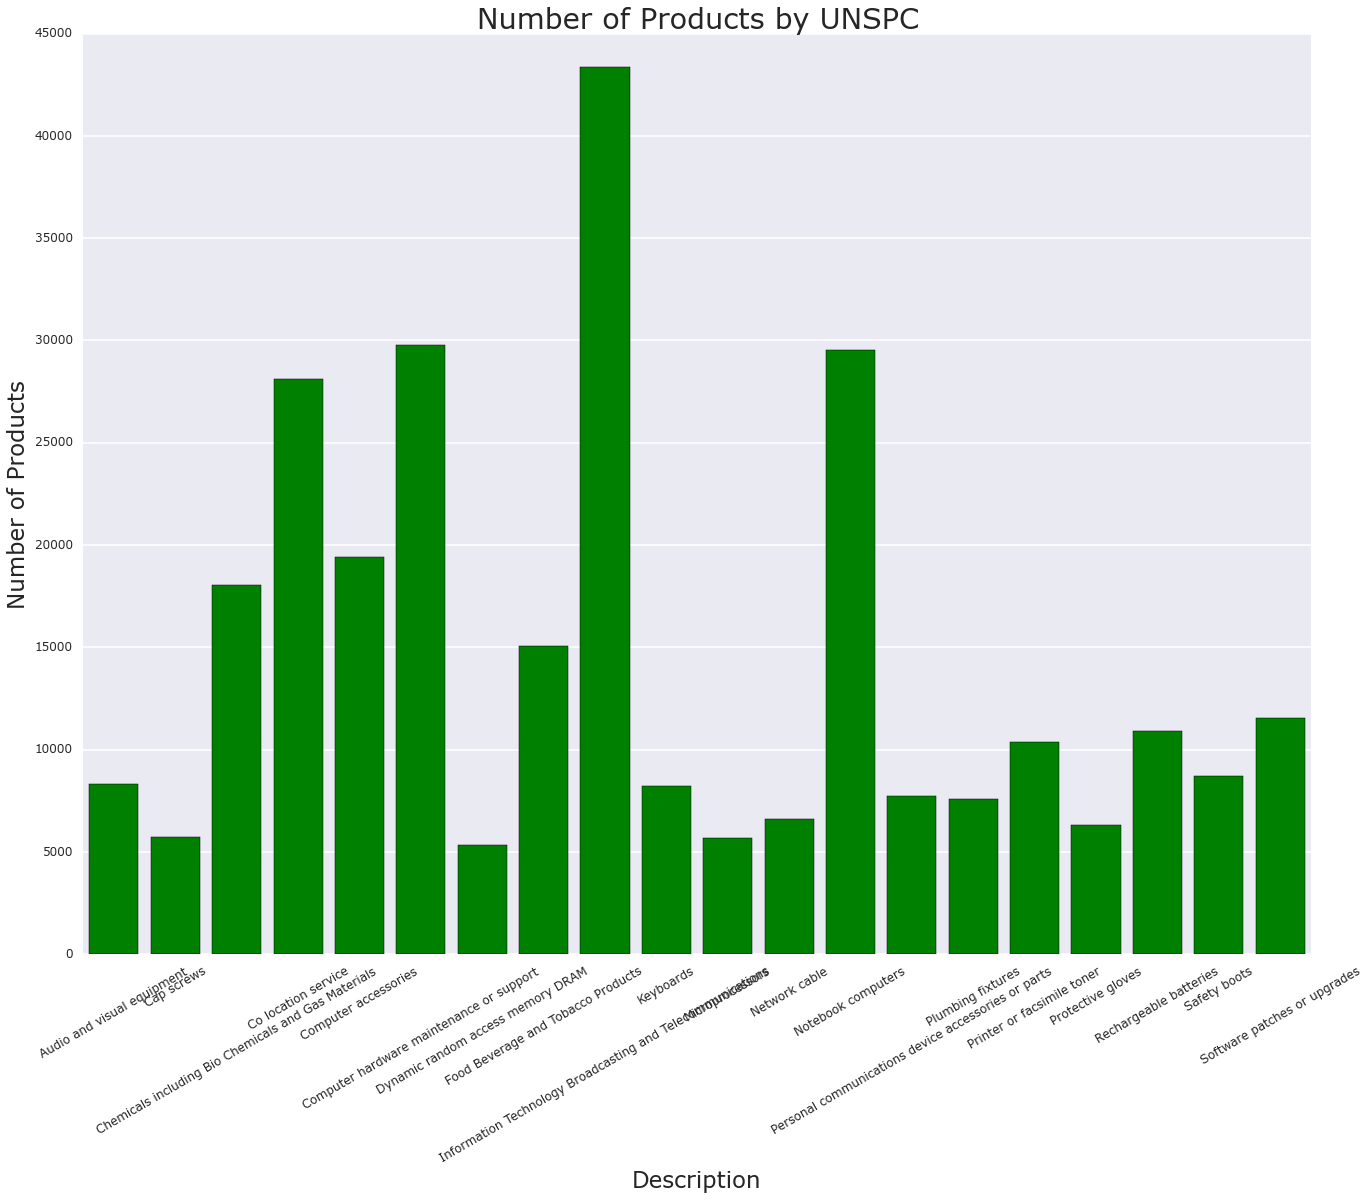

In [172]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
sns.set(font="Verdana")
sns.set_context("poster", rc={"figure.figsize": (20, 12)}, font_scale=1.5)
unspc_plot = sns.barplot("description", "product_count", data=unspc_top, color="green")
unspc_plot.tick_params(axis='both', which='major', labelsize=12)
unspc_plot.set_title("Number of Products by UNSPC")
unspc_plot.set_xlabel("Description")
unspc_plot.set_ylabel("Number of Products")

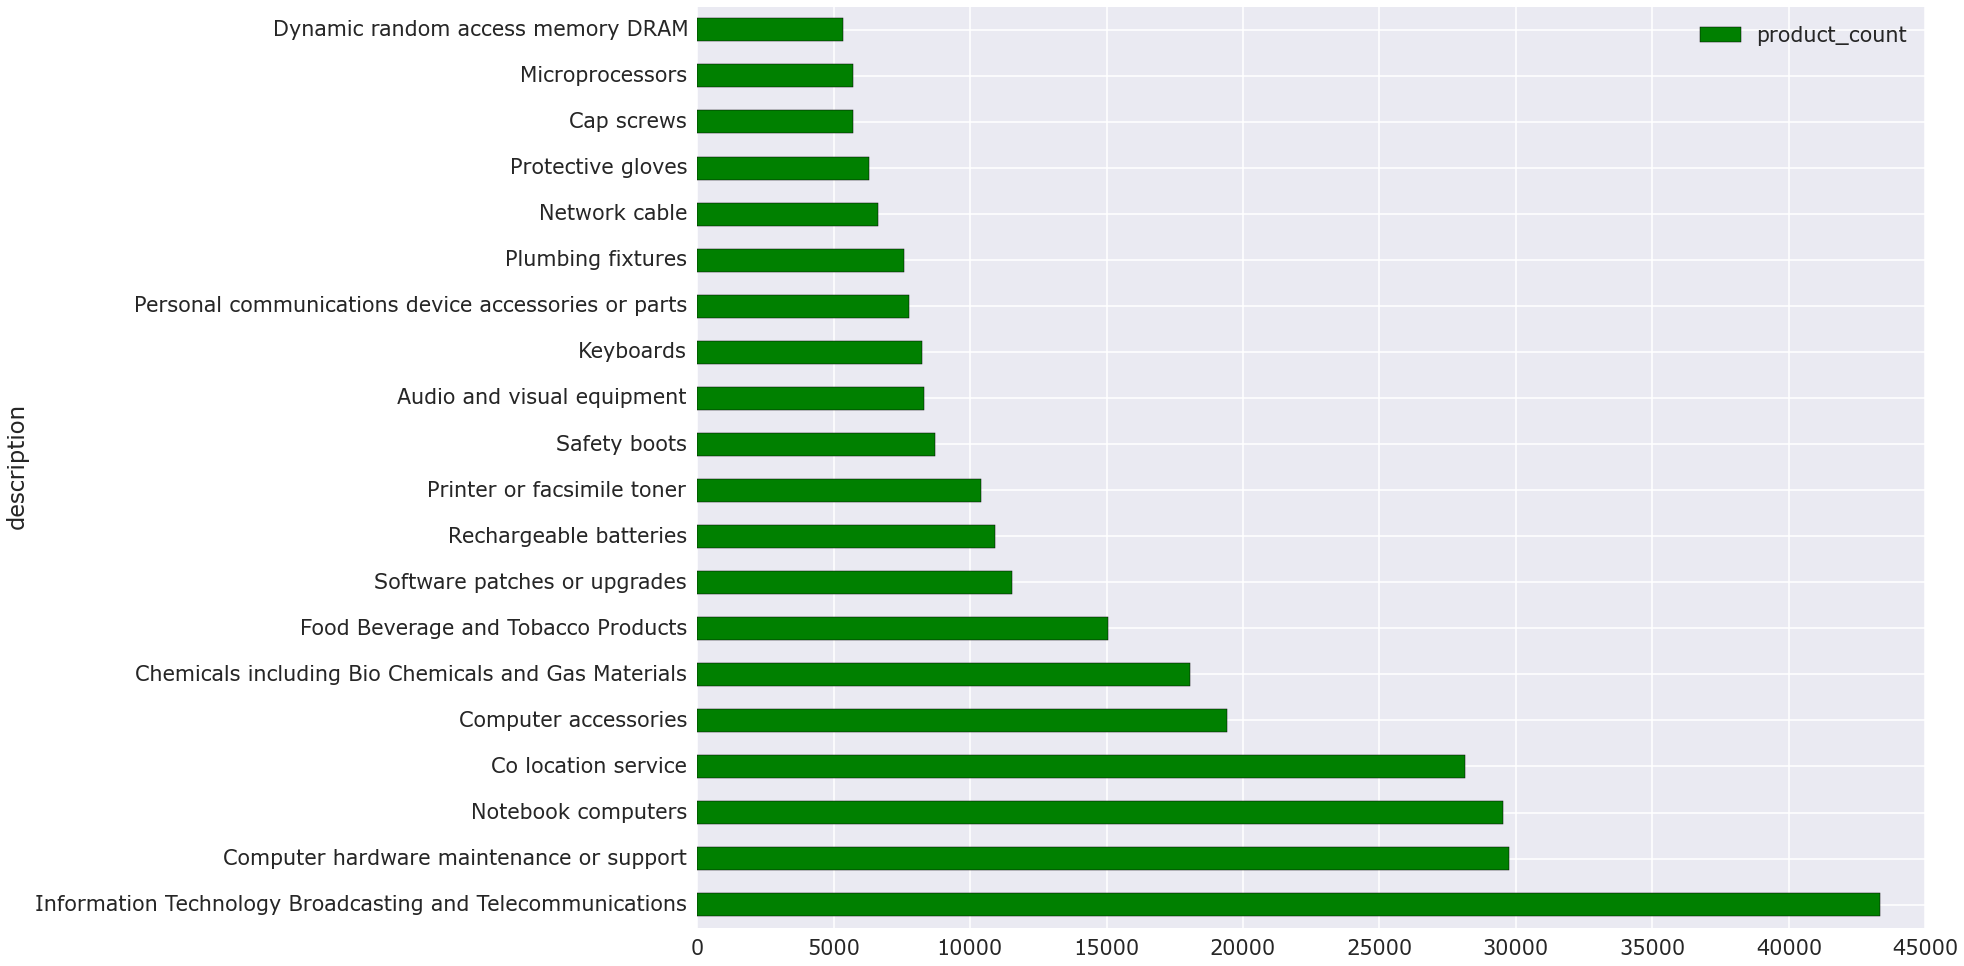

In [169]:
unspc_top = unspc_top.head(20)
sns.set(font="Verdana")
sns.set_context("poster", rc={"figure.figsize": (22, 16.5)}, font_scale=1.3)
unspc_top.plot("description", "product_count", kind="barh", color="green")

In [133]:
unspc_top.head()

,unspsc_category_id,level,description,product_count
0,15425,43,Information Technology Broadcasting and Teleco...,43343
1,22444,81111812,Computer hardware maintenance or support,29759
2,15561,43211503,Notebook computers,29538
3,22445,81111814,Co location service,28136
4,15570,432116,Computer accessories,19411


In [316]:
aggregated = pd.read_csv("aggregated_manuf_topunspsc_prodcount.csv", sep = ",", header=None, skiprows=0, names=['manufacturer_id', 'Manufacturer Name', 'highestcategory', 'Product Count', 'level', 'category_description'])

In [317]:
aggregated.head()

,manufacturer_id,Manufacturer Name,highestcategory,Product Count,level,category_description
0,6,"OfficeMax, Inc.",44,2,44,Office Equipment and Accessories and Supplies
1,21320,Migros,32,1,32,Electronic Components and Supplies
2,21397,Bell,23,2,23,Industrial Manufacturing and Processing Machin...
3,21397,Bell,39,48,39,Electrical Systems and Lighting and Components...
4,21397,Bell,44,5,44,Office Equipment and Accessories and Supplies


In [195]:
aggregated = aggregated.head(10)

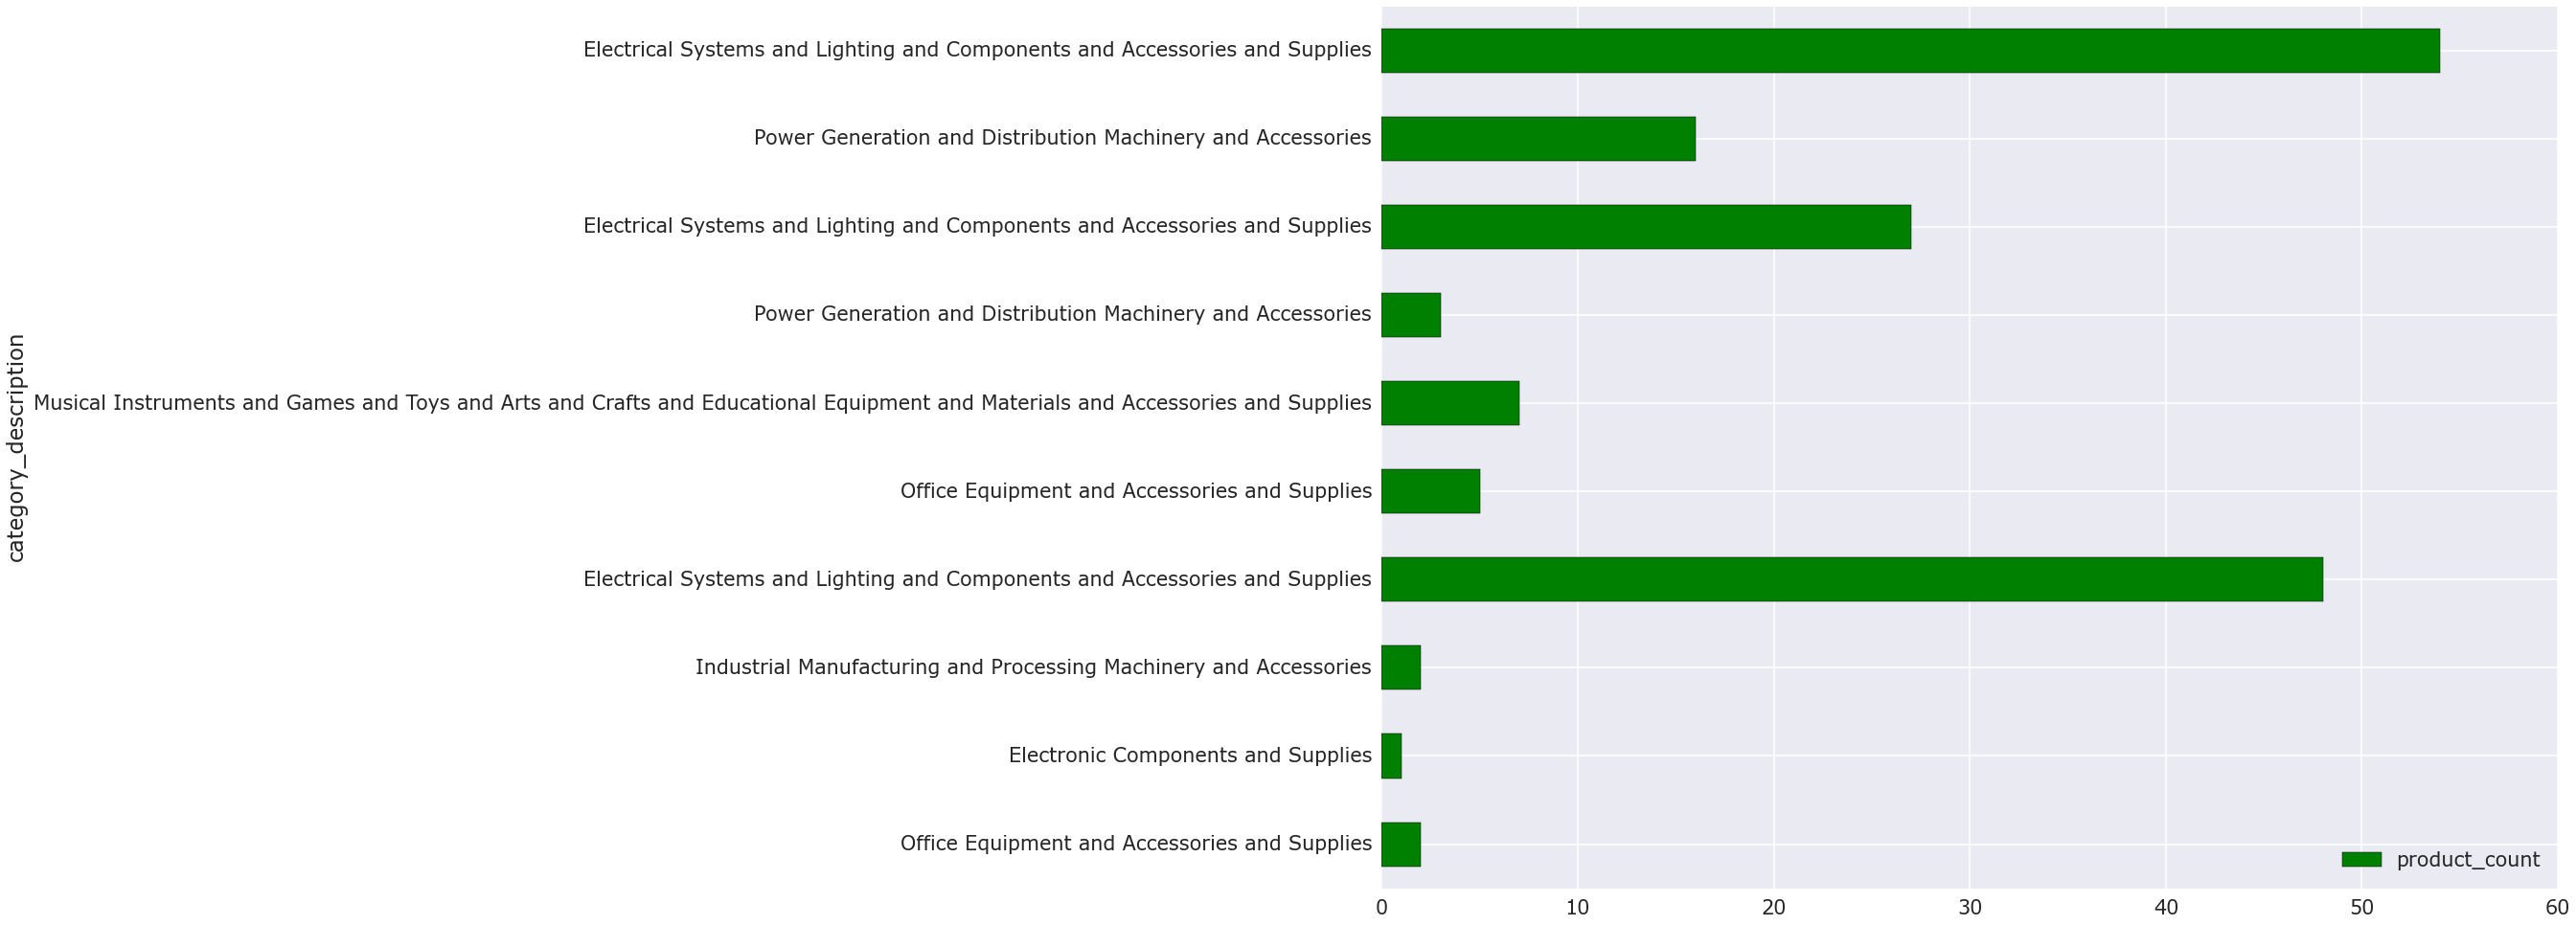

In [198]:
sns.set(font="Verdana")
sns.set_context("poster", rc={"figure.figsize": (22, 16.5)}, font_scale=1.3)
aggregated.plot("category_description", "product_count", kind="barh", color="green")

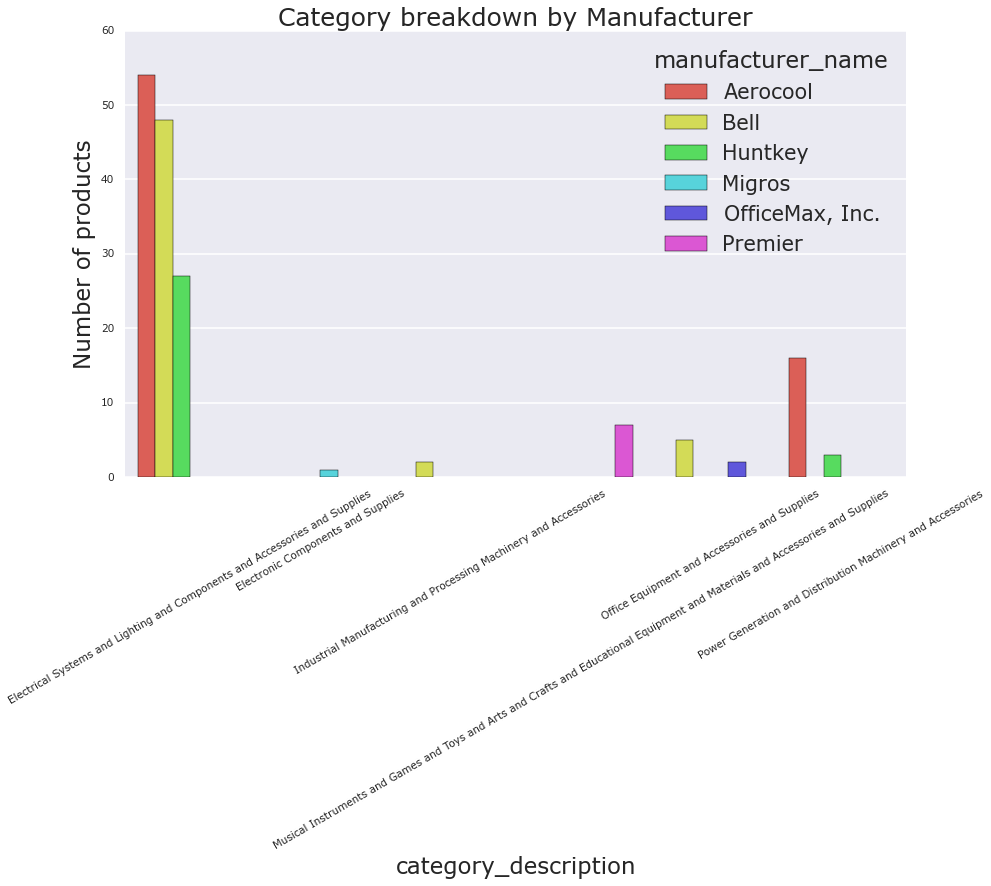

In [201]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
sns.set_context(rc={"figure.figsize": (14, 8)})
aggregated_plot = sns.barplot("category_description", "product_count","manufacturer_name", aggregated, palette = sns.color_palette("hls"))
aggregated_plot.tick_params(axis='both', which='major', labelsize=10.5)
aggregated_plot.set_title("Category breakdown by Manufacturer")
aggregated_plot.set_ylabel("Number of products")

In [341]:
category_counts = pd.DataFrame(aggregated['category_description'].value_counts())

In [342]:
category_counts = category_counts.reset_index()

In [343]:
category_counts.columns = ['Category', 'Counts']

In [346]:
category_top = category_counts.sort('Counts', ascending=False).head(20)

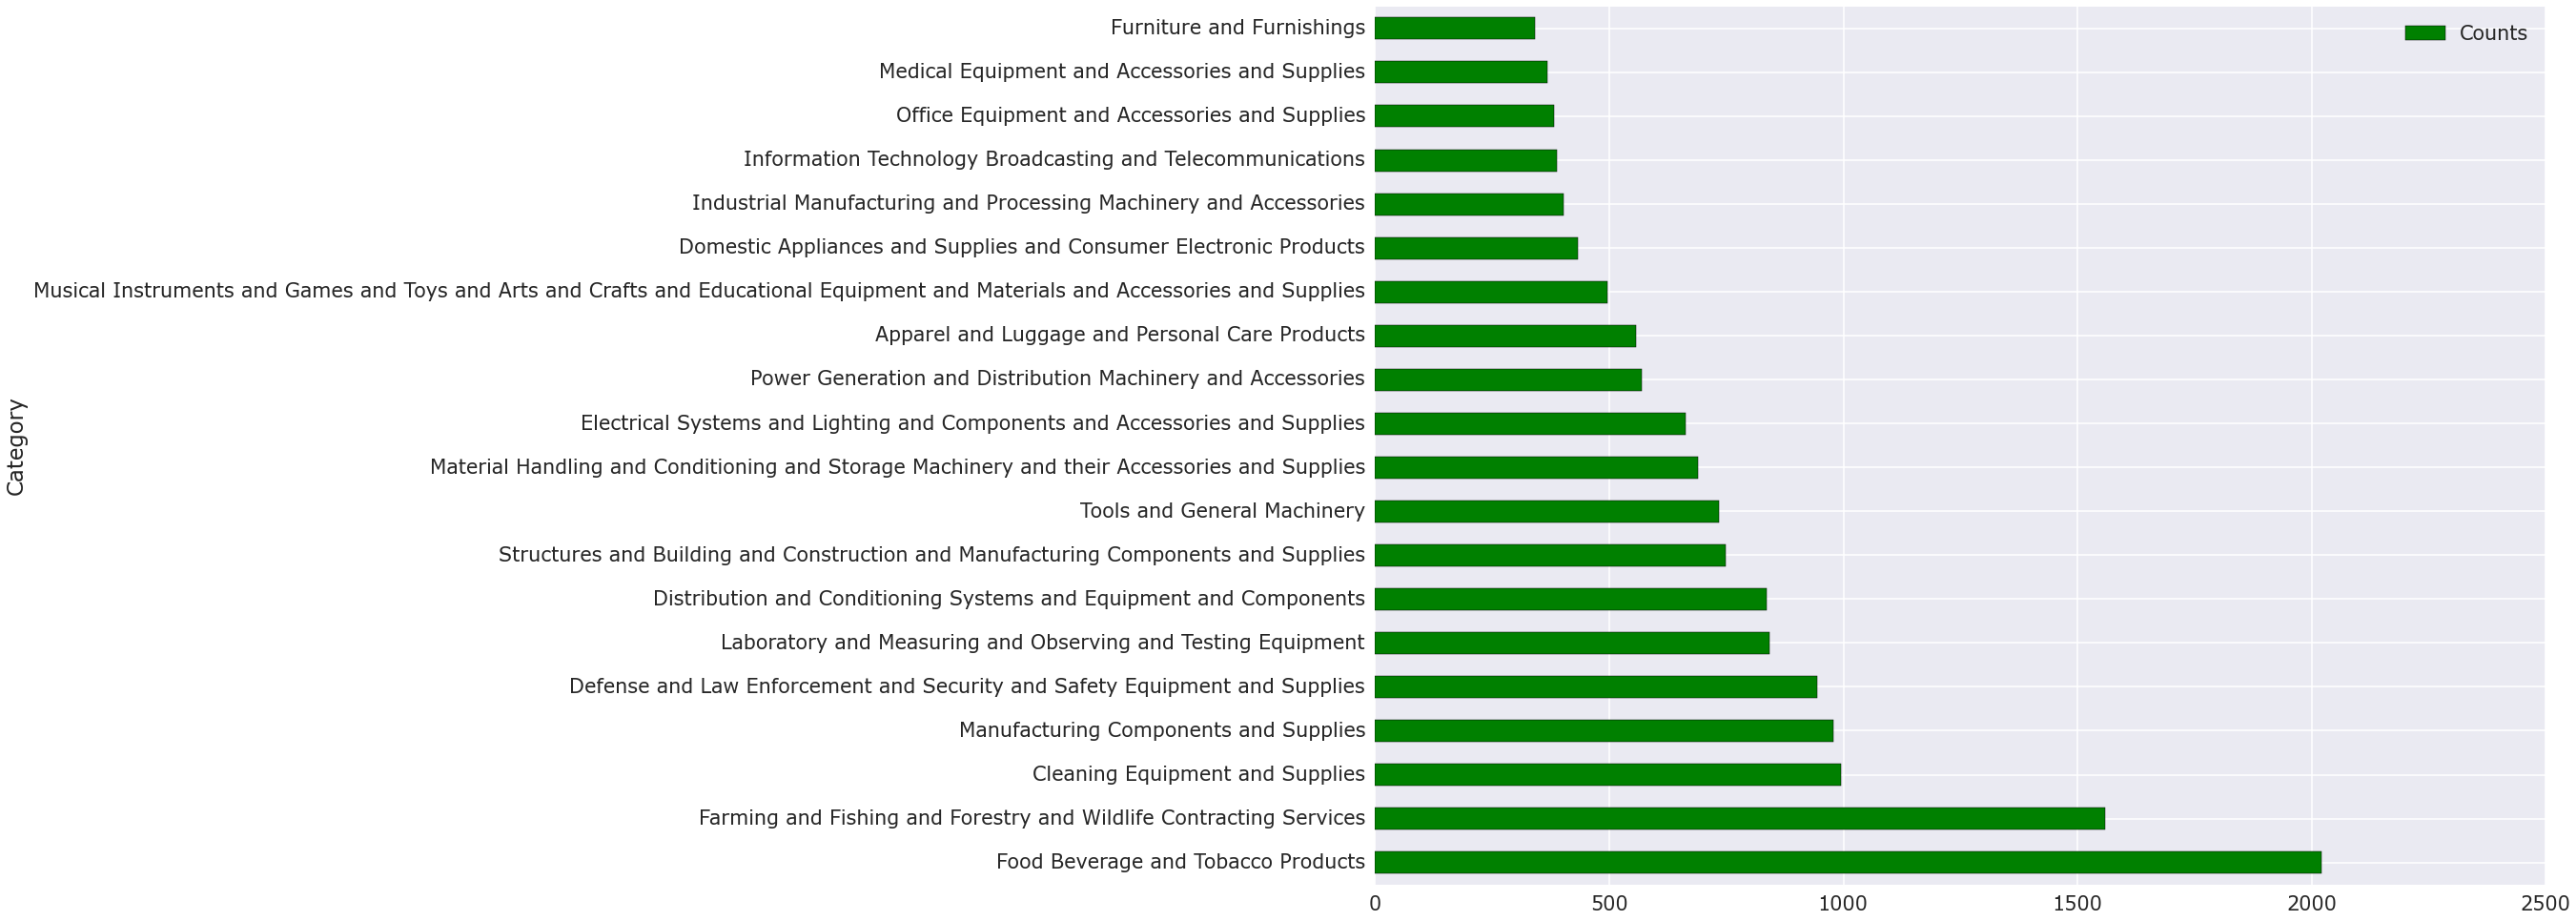

In [347]:
sns.set(font="Verdana")
sns.set_context("poster", rc={"figure.figsize": (22, 16.5)}, font_scale=1.3)
category_top.plot('Category','Counts', kind='barh', color='green')

In [348]:
 category_top['Category']

0                    Food Beverage and Tobacco Products
1     Farming and Fishing and Forestry and Wildlife ...
2                       Cleaning Equipment and Supplies
3                 Manufacturing Components and Supplies
4     Defense and Law Enforcement and Security and S...
5     Laboratory and Measuring and Observing and Tes...
6     Distribution and Conditioning Systems and Equi...
7     Structures and Building and Construction and M...
8                           Tools and General Machinery
9     Material Handling and Conditioning and Storage...
10    Electrical Systems and Lighting and Components...
11    Power Generation and Distribution Machinery an...
12       Apparel and Luggage and Personal Care Products
13    Musical Instruments and Games and Toys and Art...
14    Domestic Appliances and Supplies and Consumer ...
15    Industrial Manufacturing and Processing Machin...
16    Information Technology Broadcasting and Teleco...
17        Office Equipment and Accessories and S

In [360]:
def plot_best_category(rank, c):
    category_name = category_top['Category'][rank]
    aggregated_by_category = aggregated[aggregated['category_description'] == category_name]
    sns.set(font="Helvetica")
    sns.set_context("poster", rc={"figure.figsize": (22, 16.5)}, font_scale=1.3)
    data = aggregated_by_category.sort("Product Count", ascending=False).head(10)
    data.plot('Manufacturer Name','Product Count', kind='barh', color=c, title=category_name)

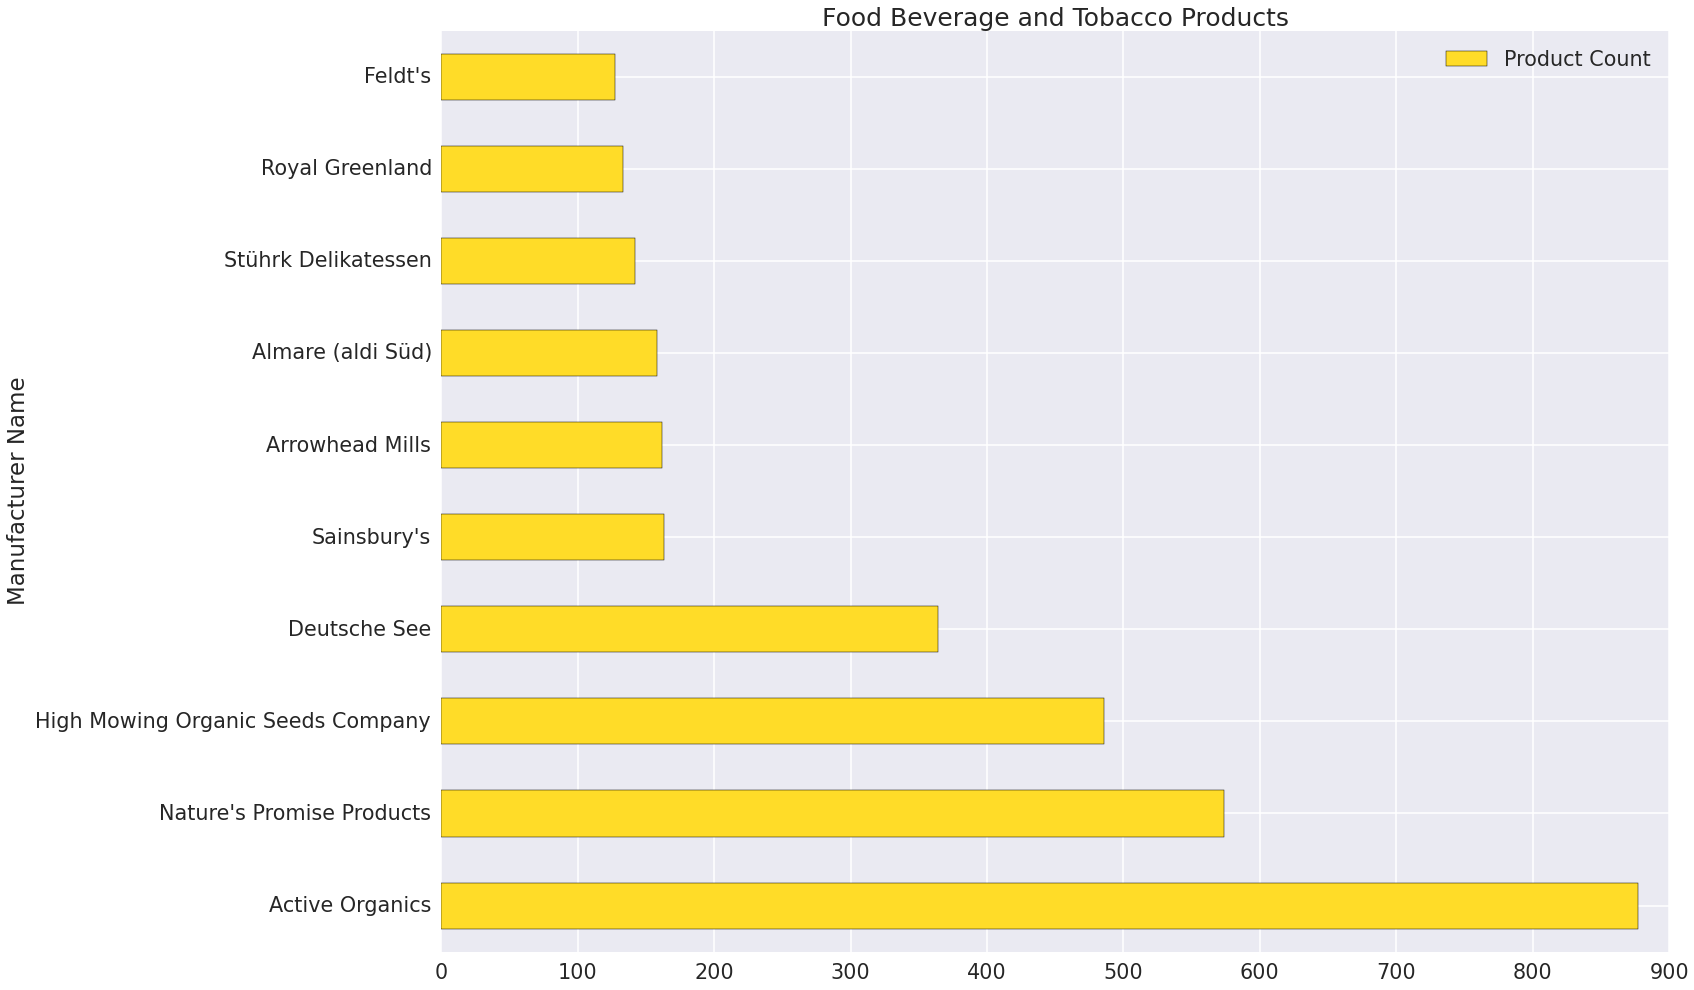

In [378]:
plot_best_category(0, '#FFDC28')


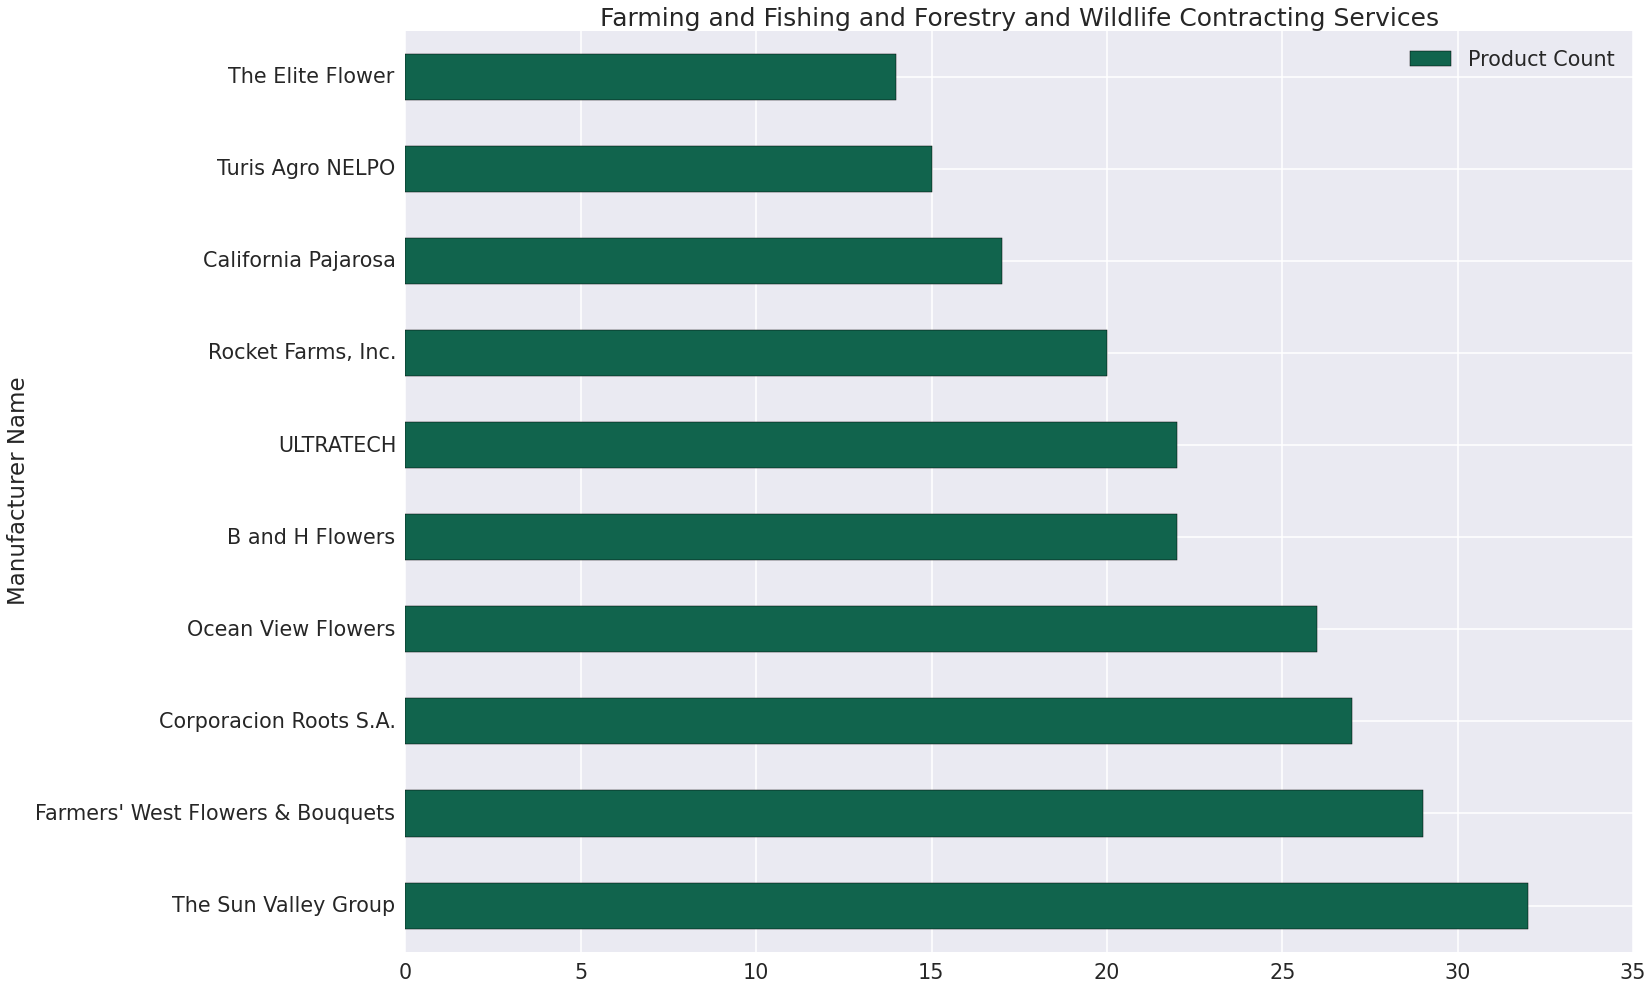

In [363]:
plot_best_category(1, '#11644D')

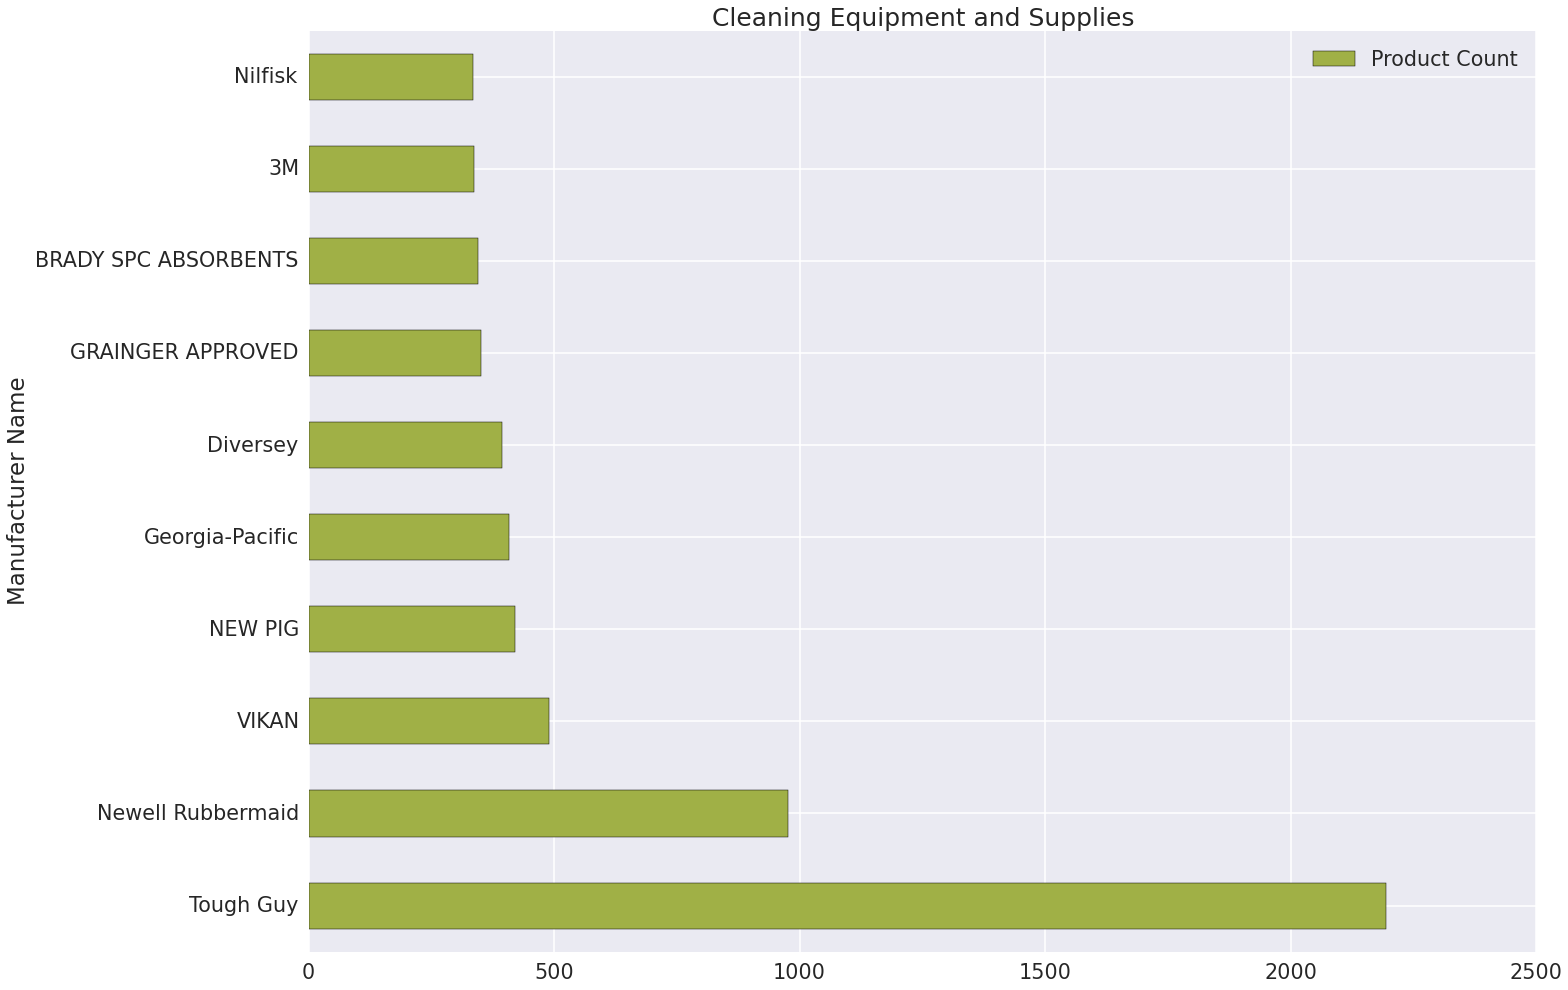

In [364]:
plot_best_category(2, "#A0B046")

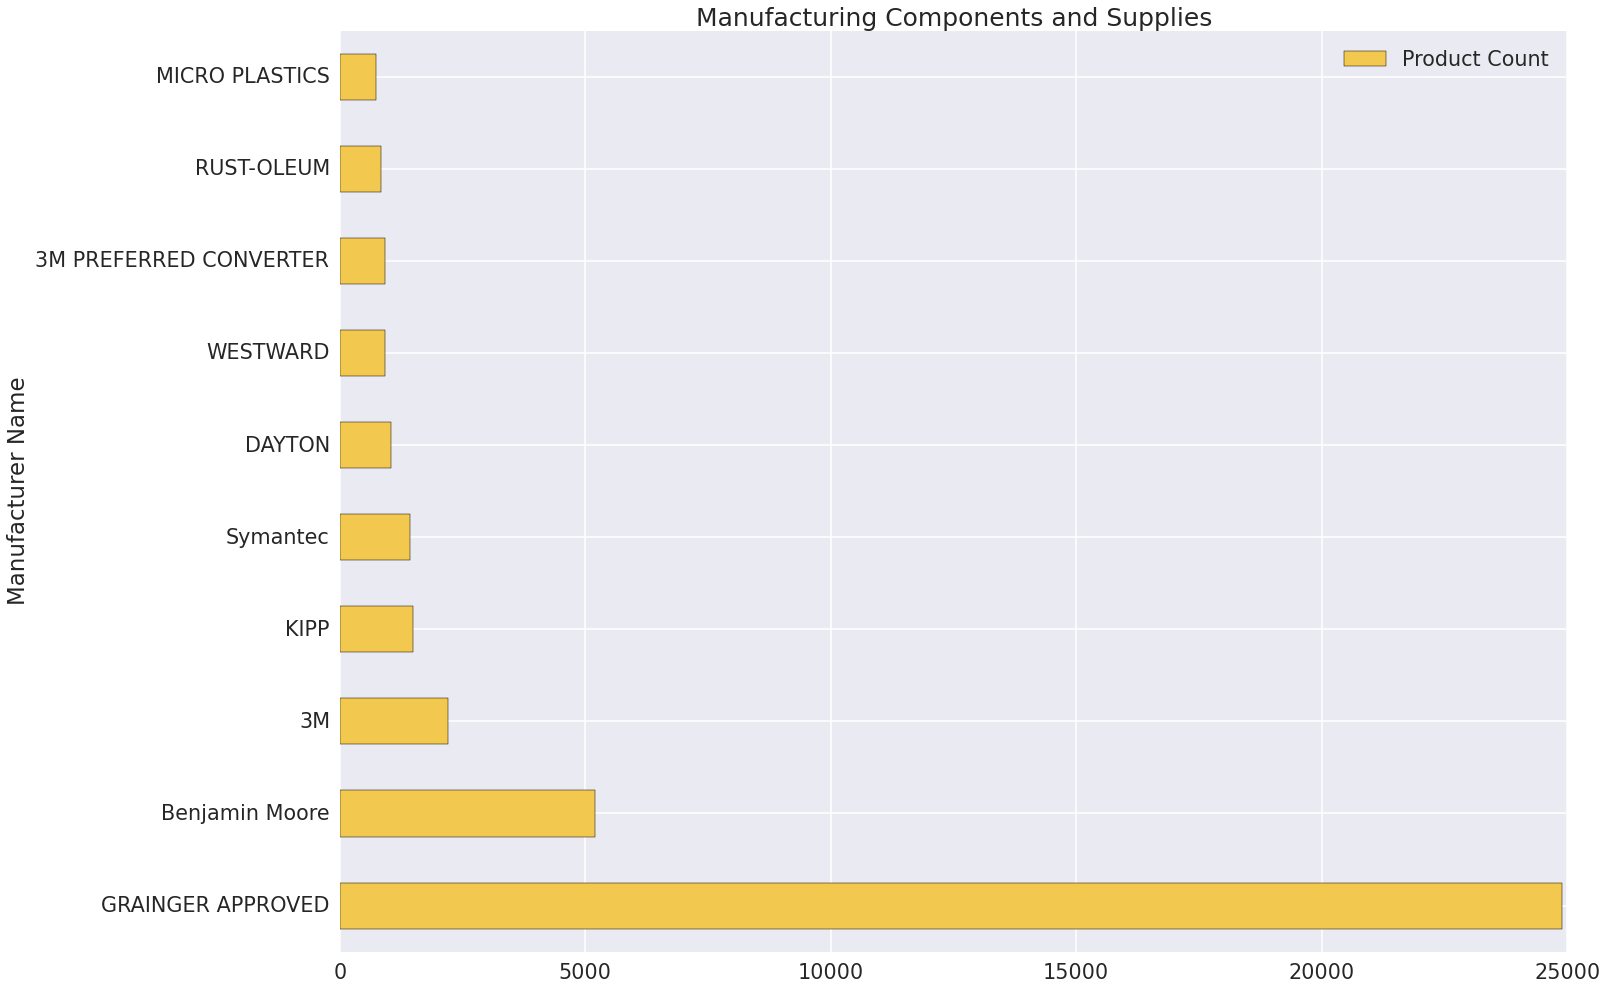

In [365]:
plot_best_category(3, "#F2C94E")

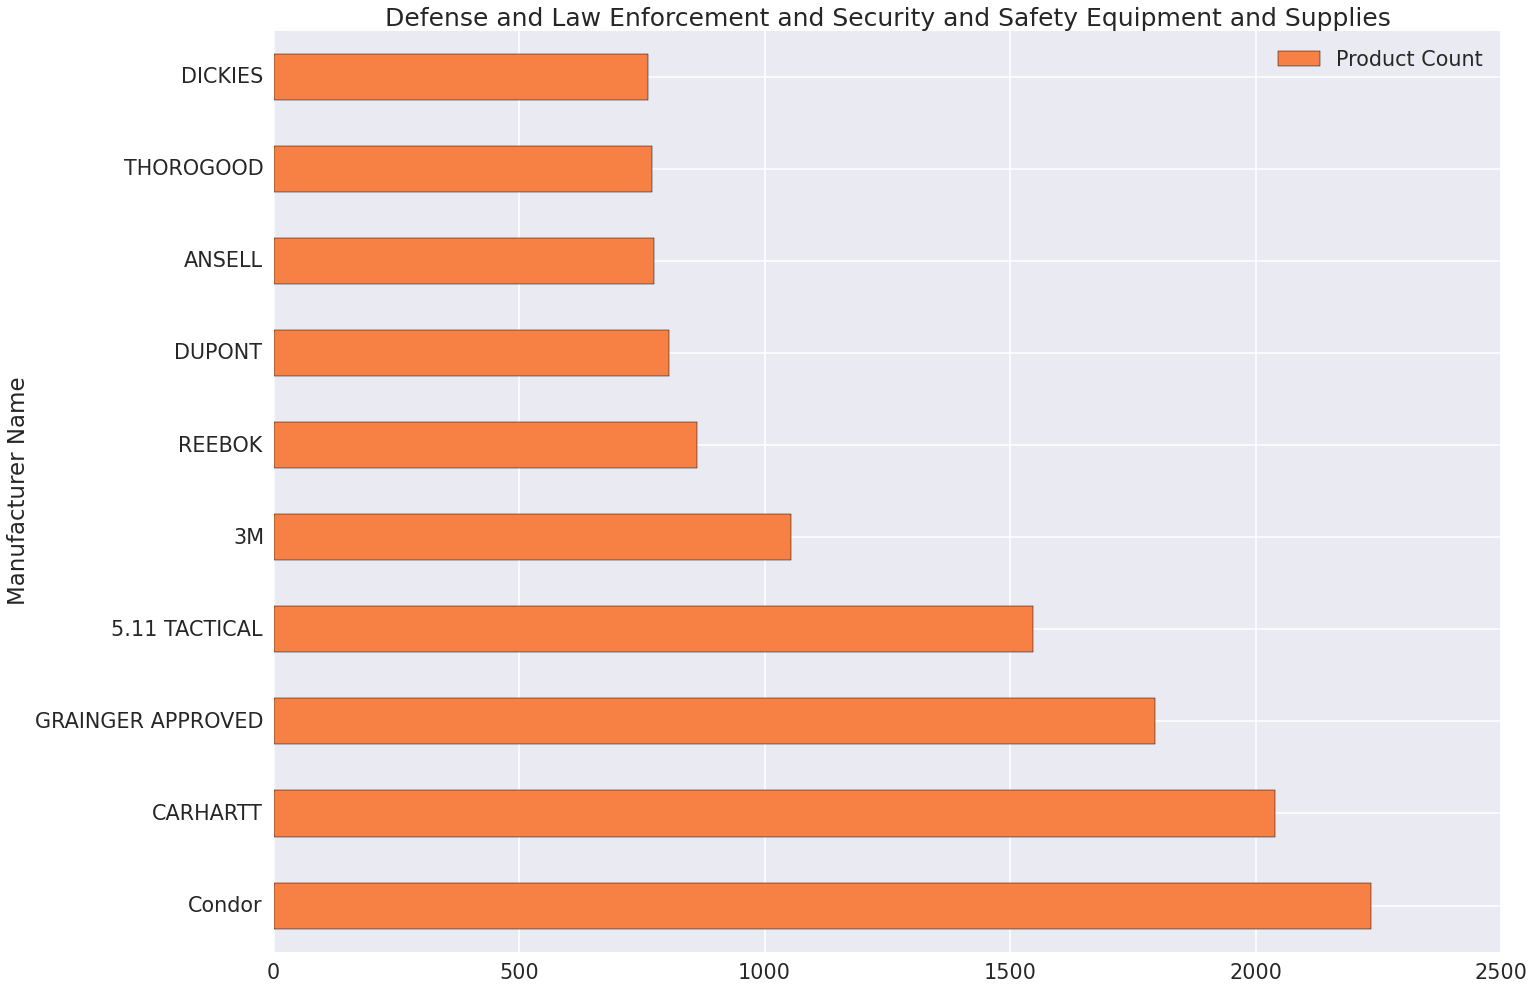

In [366]:
plot_best_category(4, "#F78145")

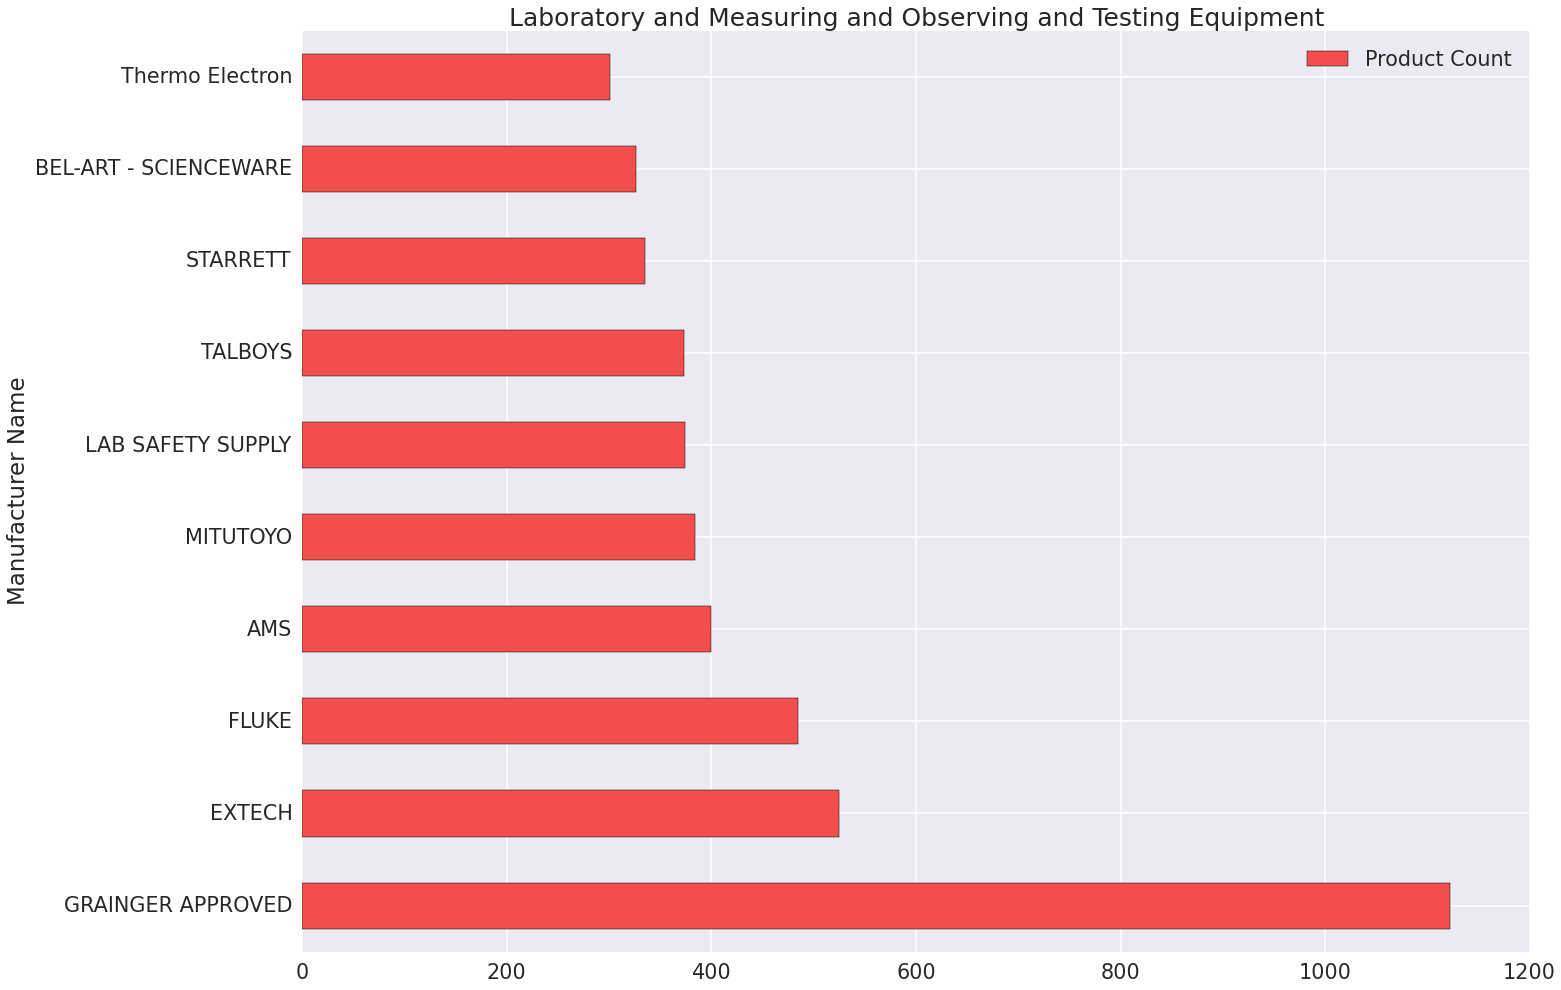

In [367]:
plot_best_category(5, "#F24E4E")

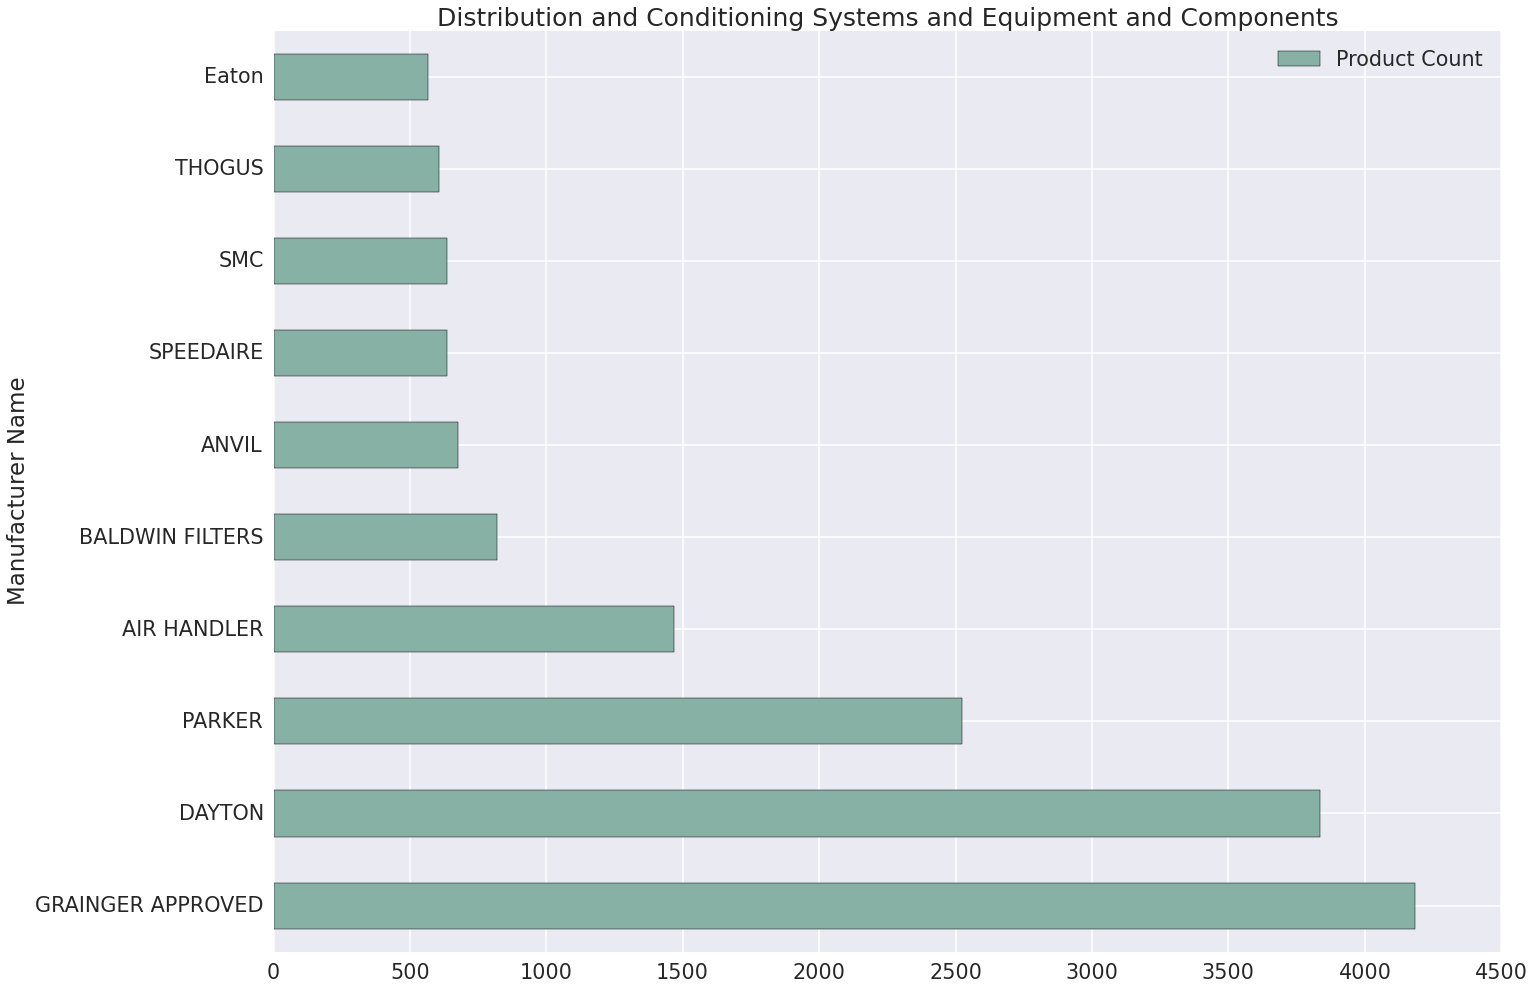

In [368]:
plot_best_category(6, "#88B1A6")

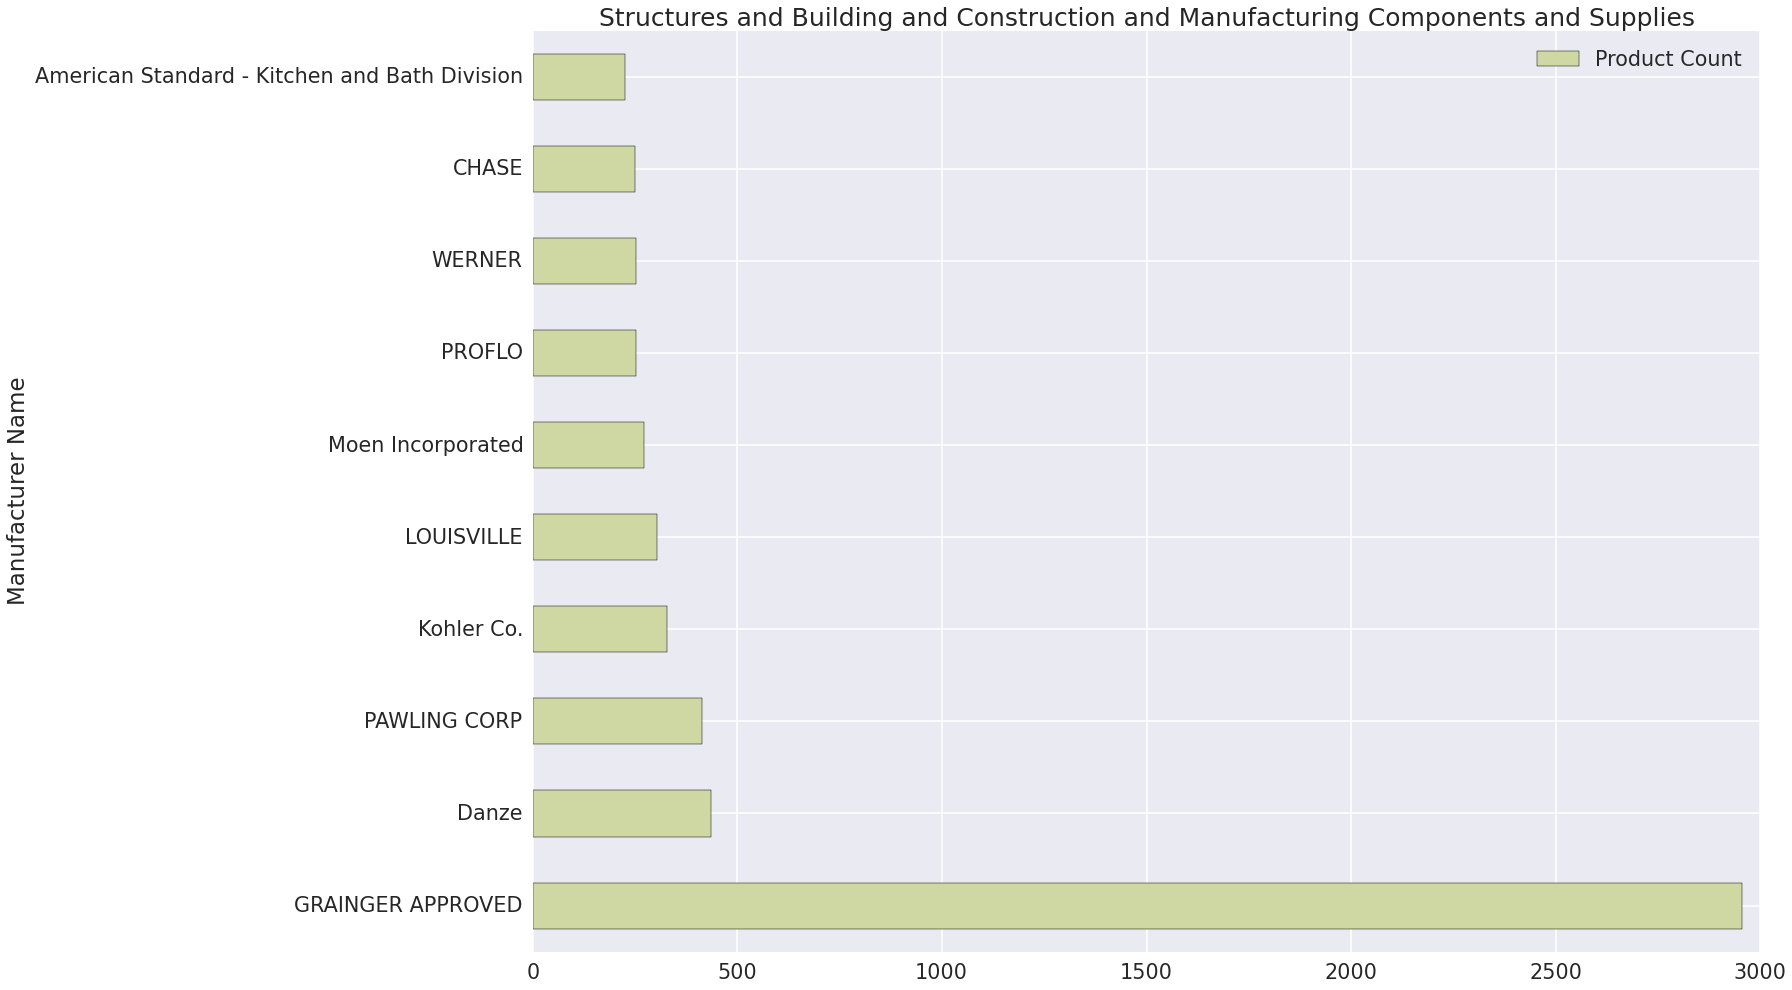

In [370]:
plot_best_category(7, "#CFD7A2")

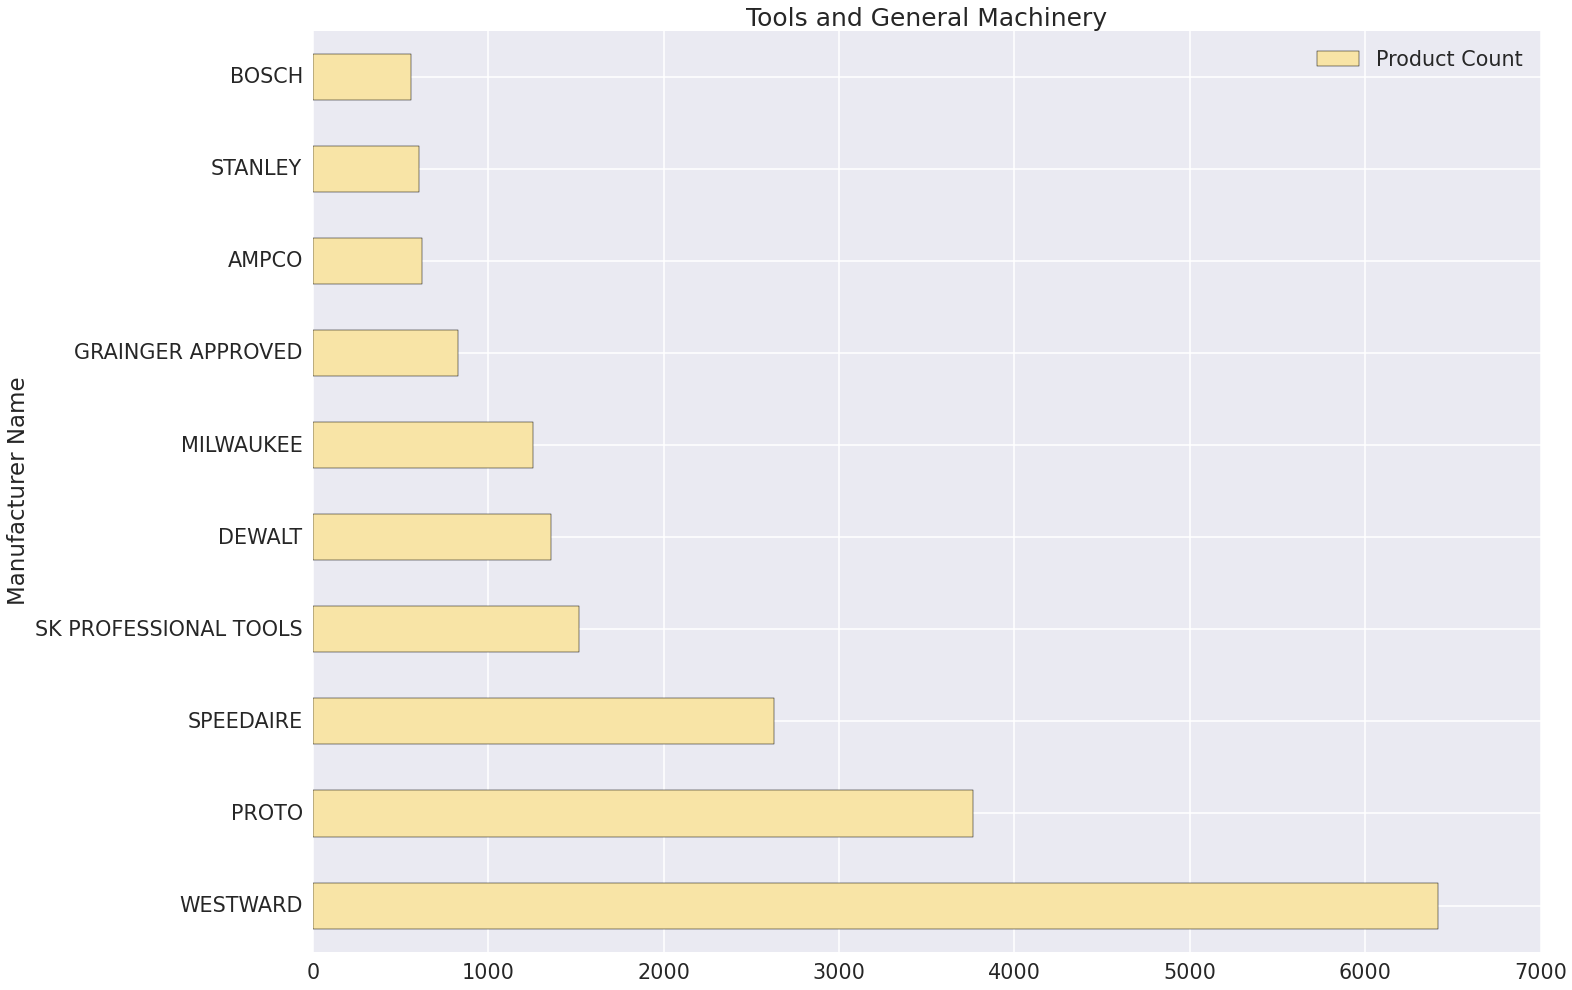

In [371]:
plot_best_category(8, "#F8E4A6")

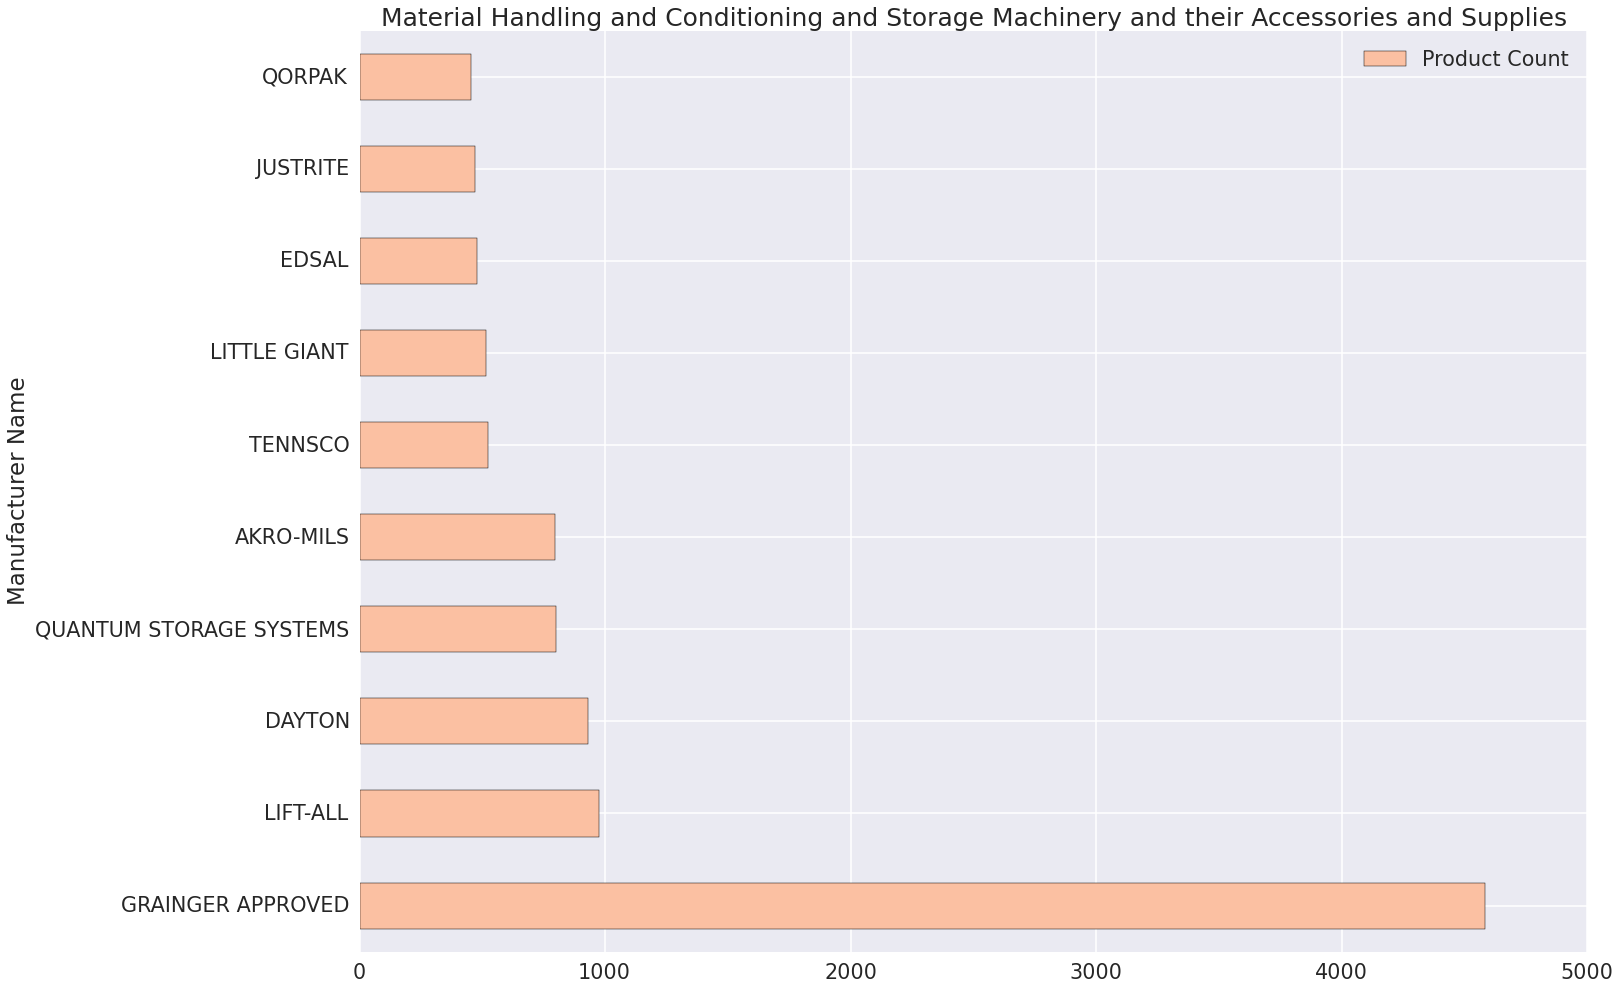

In [374]:
plot_best_category(9, "#FBC0A2")

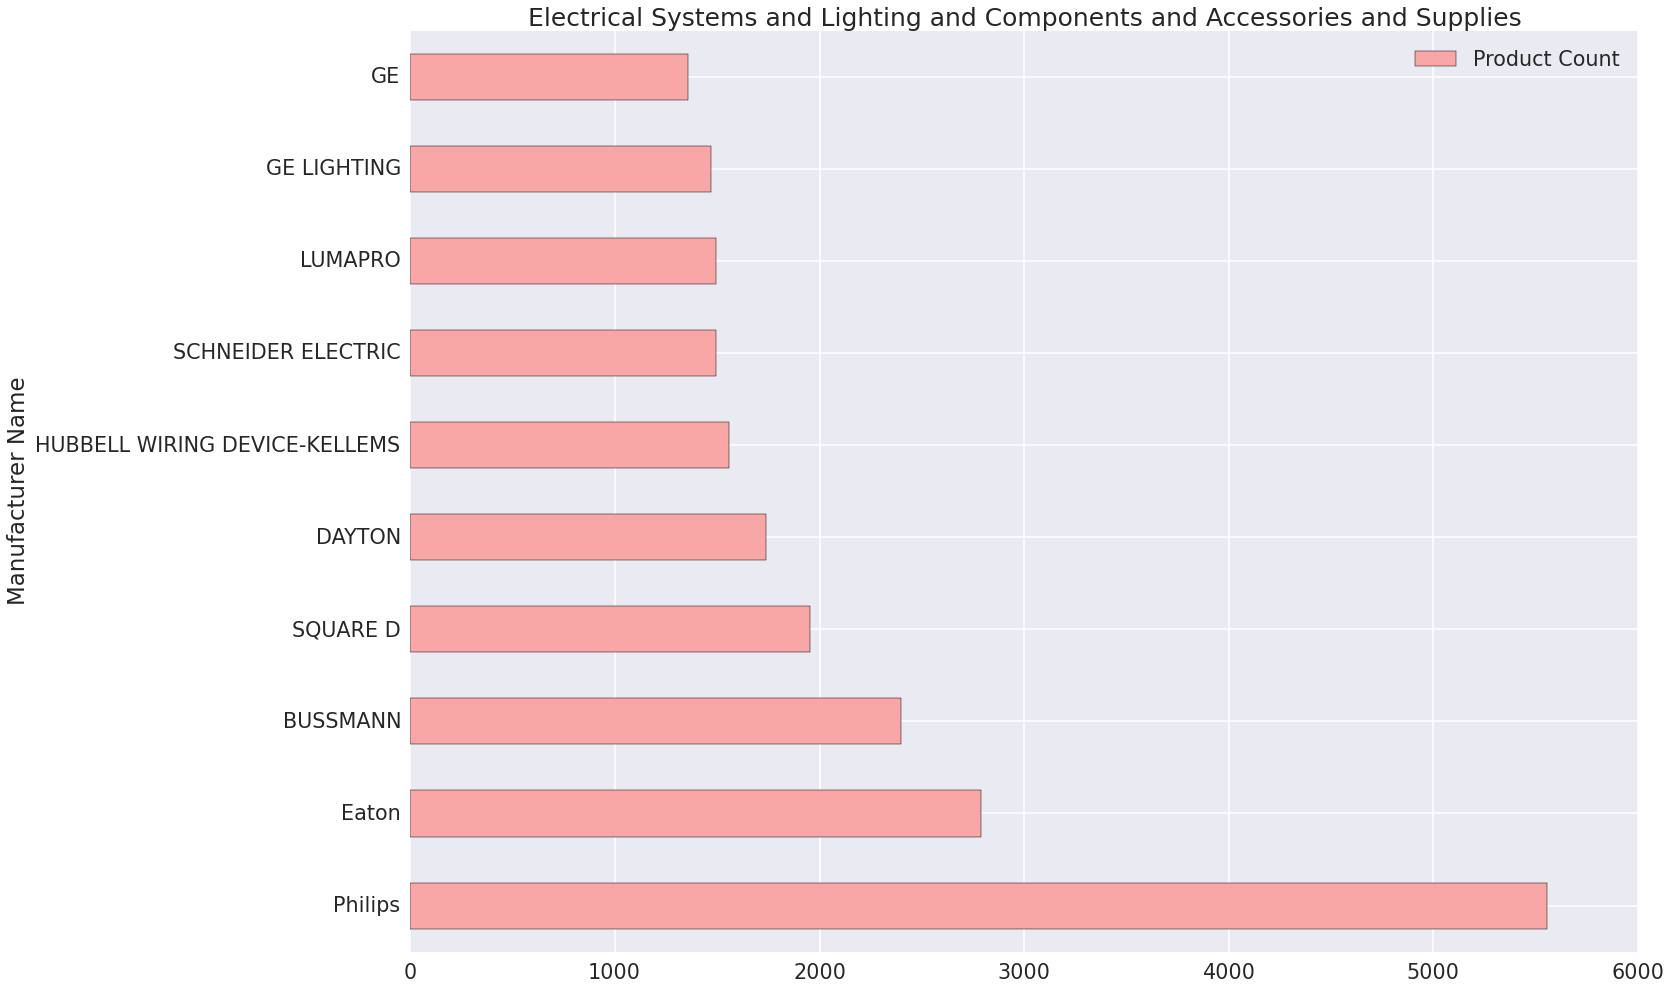

In [375]:
plot_best_category(10, "#F8A6A6")